In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import shap
import json
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

from imblearn.over_sampling import SMOTE

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [21]:

import kagglehub

path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


In [22]:
import os

files = os.listdir(path)
print("Files in the directory:", files)

Files in the directory: ['WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [23]:
file_path = "/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)


display(df.head(10))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [24]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

In [25]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


display(df.isnull().sum())

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [26]:
df.dropna(subset=['TotalCharges'], inplace=True)

display(df.isnull().sum())

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [27]:
X = df.drop('Churn', axis=1)
y = df['Churn']
type(X)

y = y.apply(lambda x: 1 if x == 'Yes' else 0)

categorical_features = X.select_dtypes(include='object').columns.tolist()
print(categorical_features)
categorical_features.remove('customerID')
continuous_features = X.select_dtypes(include=np.number).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
     remainder='drop'
)

X_processed0 = preprocessor.fit_transform(X)

ohe_feature_names_clustering = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names_clustering = continuous_features + list(ohe_feature_names_clustering)

X_processed = pd.DataFrame(X_processed0, columns=all_feature_names_clustering)

print("First 5 rows of the df_clustering DataFrame:")
print(X_processed.head())

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
First 5 rows of the df_clustering DataFrame:
   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Female  \
0      -0.440327 -1.280248       -1.161694     -0.994194            1.0   
1      -0.440327  0.064303       -0.260878     -0.173740            0.0   
2      -0.440327 -1.239504       -0.363923     -0.959649            0.0   
3      -0.440327  0.512486       -0.747850     -0.195248            0.0   
4      -0.440327 -1.239504        0.196178     -0.940457            1.0   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  ...  \
0          0.0         0.0          1.0            1.0             0.0  ...   
1          1.0         1.0          0.0            1.0             0.0  ...   
2          1.

In [28]:
display(df.describe())

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


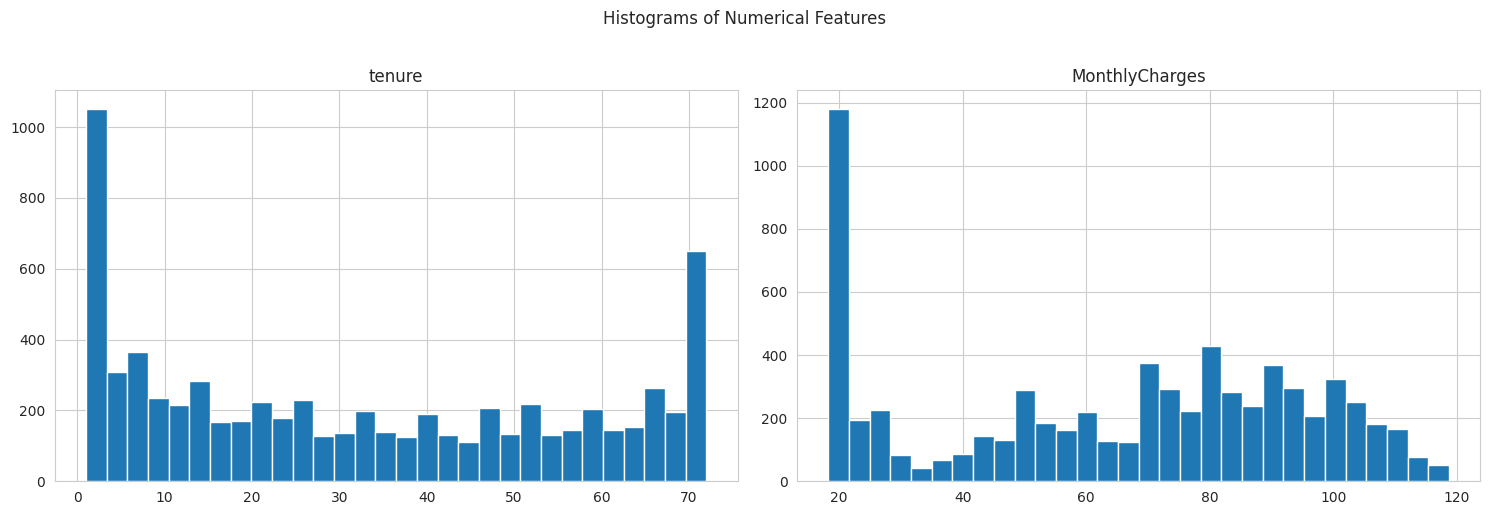

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

numerical_features = ['tenure', 'MonthlyCharges']
df[numerical_features].hist(bins=30, figsize=(15, 5))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()



/tmp/ipython-input-2699775273.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-2699775273.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-2699775273.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-2699775273.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x

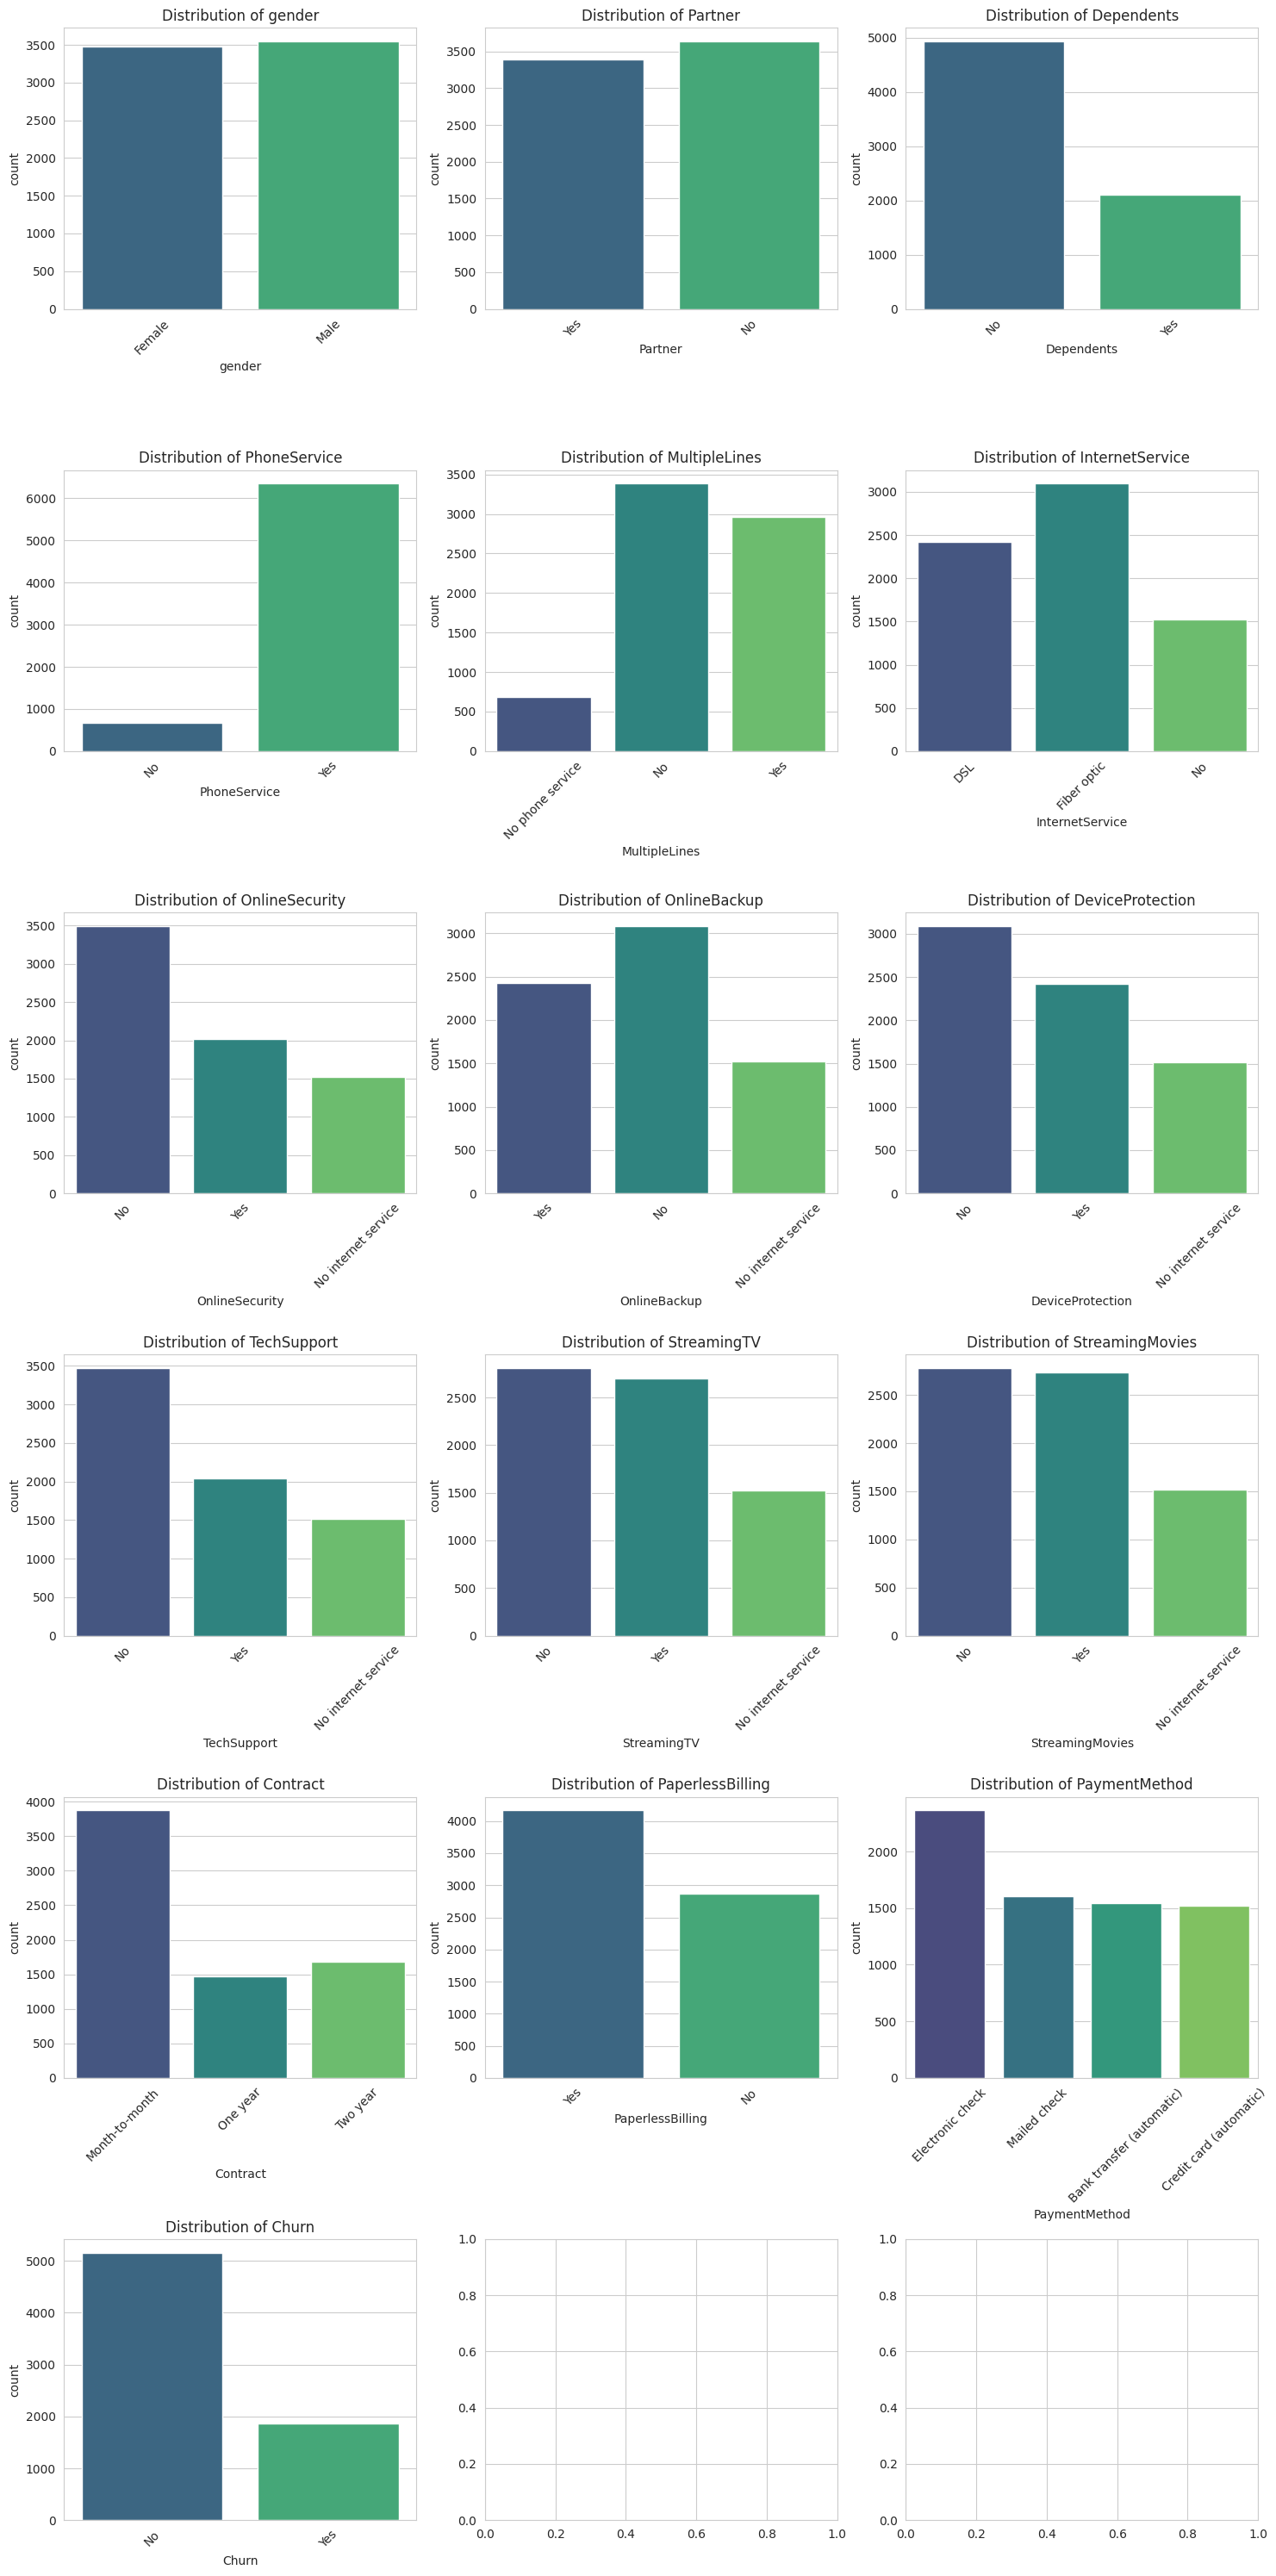

In [30]:
categorical_features = df.select_dtypes(include='object').columns.tolist()
categorical_features.remove('customerID')

fig, axes = plt.subplots(nrows=len(categorical_features)//3 + (len(categorical_features)%3 > 0), ncols=3,
                         figsize=(15, 5 * (len(categorical_features)//3 + (len(categorical_features)%3 > 0))))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(data=df, x=col, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

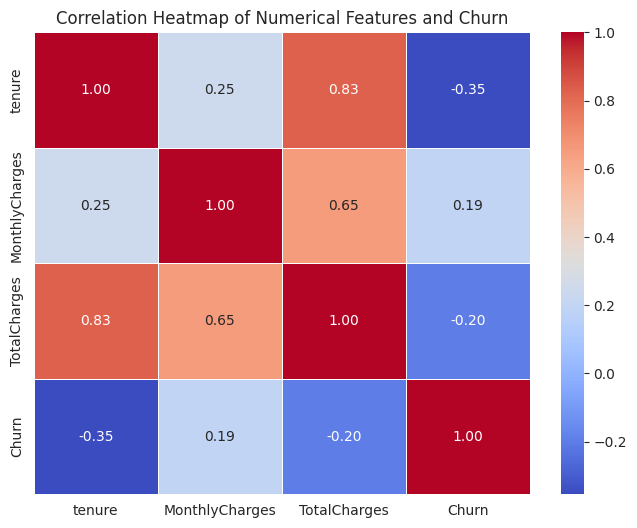

In [31]:
df_corr = df.copy()
df_corr['Churn'] = y

numerical_df_corr = df_corr[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

correlation_matrix = numerical_df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features and Churn')
plt.show()

In [32]:
df['TotalChargesPerTenure'] = df['TotalCharges'] / (df['tenure'] + 1e-6)
df['TotalChargesPerTenure'] = df['TotalChargesPerTenure'].replace([np.inf, -np.inf, np.nan], 0)


binary_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                  'StreamingMovies', 'PaperlessBilling']
for col in binary_columns:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

automatic_payment_methods = ['Bank transfer (automatic)', 'Credit card (automatic)']
df['PaymentMethod_Grouped'] = df['PaymentMethod'].apply(lambda x: 'Automatic' if x in automatic_payment_methods else 'Manual')

payment_method_grouped_dummies = pd.get_dummies(df['PaymentMethod_Grouped'], prefix='PaymentMethod_Grouped', drop_first=False)
df = pd.concat([df, payment_method_grouped_dummies], axis=1)

df.drop(['PaymentMethod', 'PaymentMethod_Grouped'], axis=1, inplace=True)


display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotalChargesPerTenure,PaymentMethod_Grouped_Automatic,PaymentMethod_Grouped_Manual
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,Month-to-month,1,29.85,29.85,No,29.849970,False,True
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,0,One year,0,56.95,1889.50,No,55.573528,False,True
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,Month-to-month,1,53.85,108.15,Yes,54.074973,False,True
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,0,0,One year,0,42.30,1840.75,No,40.905555,True,False
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,Month-to-month,1,70.70,151.65,Yes,75.824962,False,True


Independent Samples t-test for MonthlyCharges:
  t-statistic: 16.4796
  p-value: 0.0000

Visualizing Churn Differences for Categorical Features:


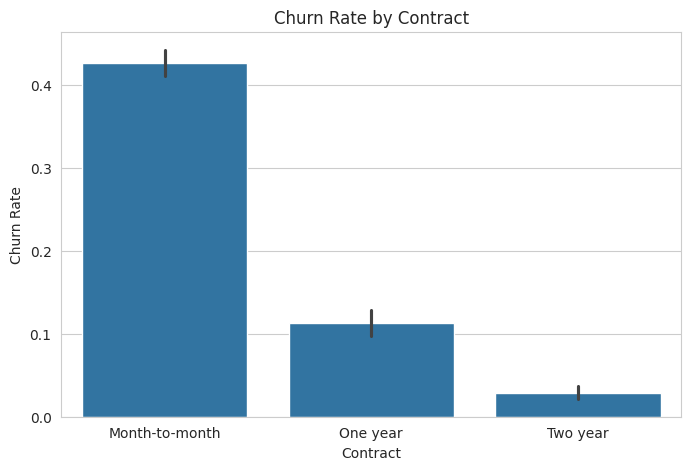

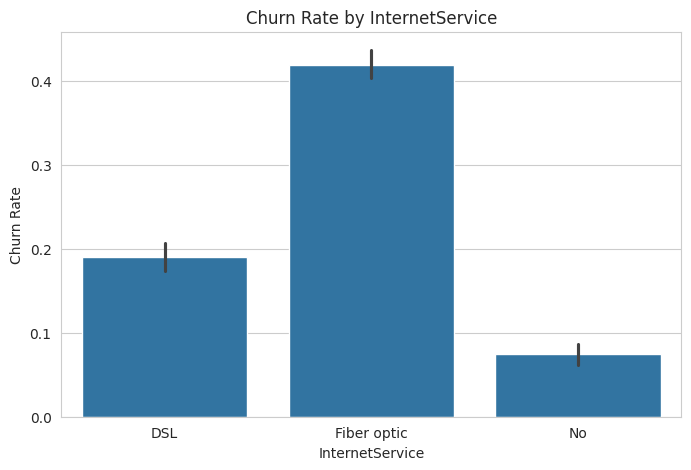

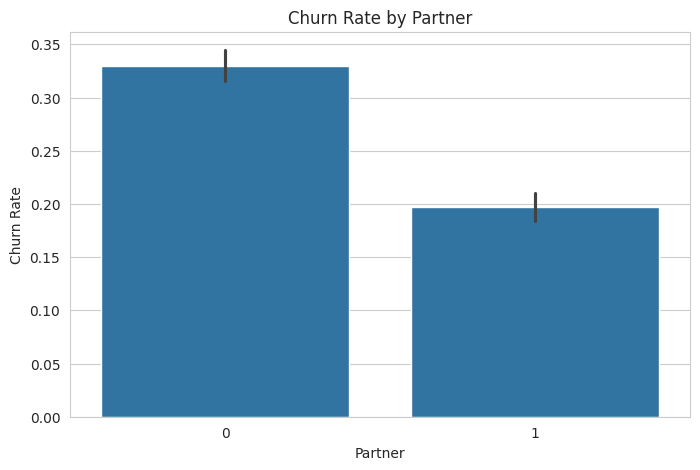

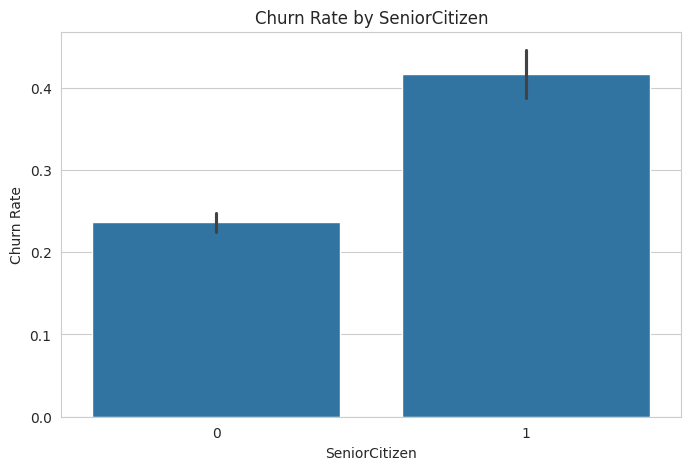


Visualizing Churn Differences for Numerical Features:


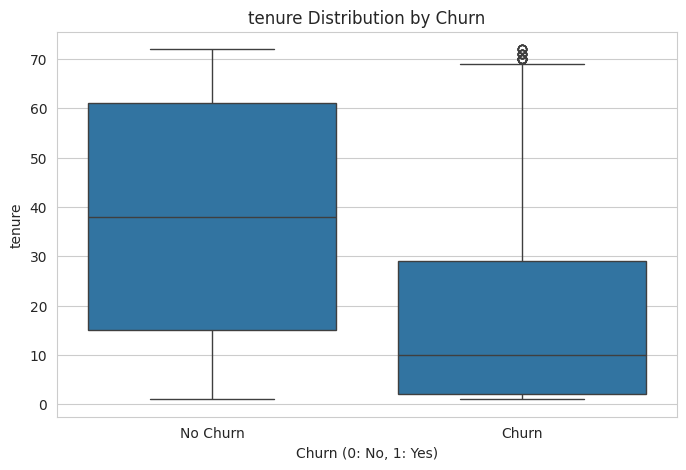

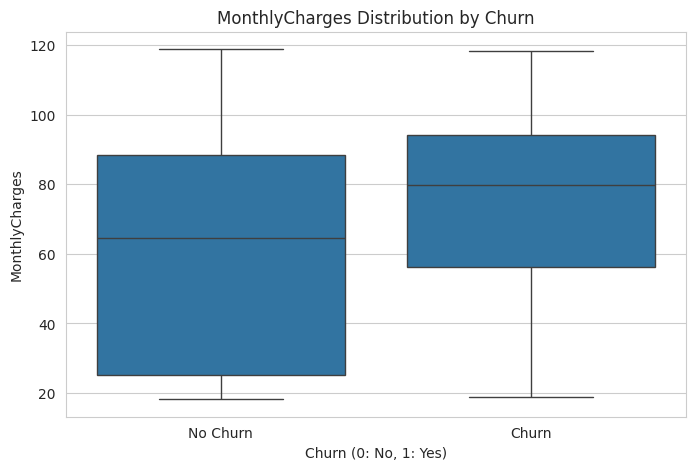

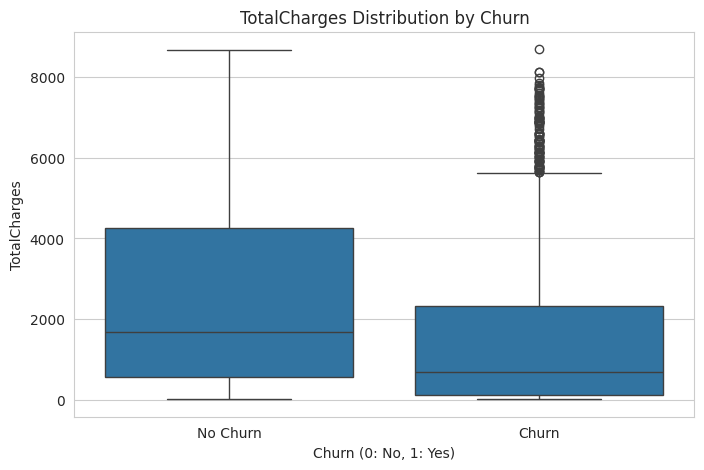

In [33]:
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

churned_monthly_charges = df[df['Churn'] == 1]['MonthlyCharges']
non_churned_monthly_charges = df[df['Churn'] == 0]['MonthlyCharges']


if len(churned_monthly_charges) > 1 and len(non_churned_monthly_charges) > 1:
    t_statistic, p_value = stats.ttest_ind(churned_monthly_charges, non_churned_monthly_charges)
    print(f"Independent Samples t-test for MonthlyCharges:")
    print(f"  t-statistic: {t_statistic:.4f}")
    print(f"  p-value: {p_value:.4f}")
else:
    print("Cannot perform t-test: Sample size for churned or non-churned customers is too small.")
    t_statistic, p_value = np.nan, np.nan

churned_df = df[df['Churn'] == 1].copy()
non_churned_df = df[df['Churn'] == 0].copy()

categorical_features_to_plot = ['Contract', 'PaymentMethod_Electronic check', 'InternetService', 'Partner', 'SeniorCitizen']
numerical_features_to_plot = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("\nVisualizing Churn Differences for Categorical Features:")
for feature in categorical_features_to_plot:
    if feature in df.columns:
        plt.figure(figsize=(8, 5))
        sns.barplot(x=feature, y='Churn', data=df)
        plt.title(f'Churn Rate by {feature}')
        plt.ylabel('Churn Rate')
        plt.xlabel(feature)
        plt.show()
    else:
        print(f"Warning: Categorical feature '{feature}' not found in DataFrame.")


print("\nVisualizing Churn Differences for Numerical Features:")
for feature in numerical_features_to_plot:
     if feature in df.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x='Churn', y=feature, data=df)
        plt.title(f'{feature} Distribution by Churn')
        plt.xlabel('Churn (0: No, 1: Yes)')
        plt.ylabel(feature)
        plt.xticks([0, 1], ['No Churn', 'Churn'])
        plt.show()
     else:
        print(f"Warning: Numerical feature '{feature}' not found in DataFrame.")

In [34]:
churn_distribution = df['Churn'].value_counts()
print("Distribution of Churn (0: No Churn, 1: Churn):")
print(churn_distribution)

churn_percentage = df['Churn'].value_counts(normalize=True) * 100
print("\nPercentage Distribution of Churn:")
display(churn_percentage)

Distribution of Churn (0: No Churn, 1: Churn):
Churn
0    5163
1    1869
Name: count, dtype: int64

Percentage Distribution of Churn:


,proportion
Churn,
0,73.421502
1,26.578498


In [35]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd

X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

if y.dtype == 'object':
    y = y.apply(lambda x: 1 if x == 'Yes' else 0)


categorical_features = X.select_dtypes(include='object').columns.tolist()
continuous_features = X.select_dtypes(include=np.number).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

X_processed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_resampled, y_train_resampled);

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled);

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_resampled, y_train_resampled);

print("Models trained successfully using SMOTE-resampled data.")

Models trained successfully using SMOTE-resampled data.


### Ensemble Modeling

Ensemble methods combine multiple machine learning models to obtain better predictive performance than could be obtained from any of the constituent models alone. Here, we will use a **Soft Voting Classifier** to combine the predictions of the Logistic Regression, Random Forest, and Gradient Boosting models.

Soft voting averages the predicted probabilities for each class from the individual models, and then predicts the class with the highest average probability. This often helps to reduce variance and bias, leading to improved generalization.

In [36]:
from sklearn.ensemble import VotingClassifier

# Soft Voting (averaging probabilities)
# Create a list of (name, estimator) tuples for the VotingClassifier
estimators = [
    ('lr', lr_model),
    ('rf', rf_model),
    ('gb', gb_model)
]

voting_clf = VotingClassifier(estimators=estimators, voting='soft')
voting_clf.fit(X_train_resampled, y_train_resampled) # Fit the voting classifier on resampled data

# Make predictions with the ensemble model
voting_test_pred = voting_clf.predict(X_test)
voting_test_proba = voting_clf.predict_proba(X_test)[:, 1]

# Evaluate the ensemble model
voting_accuracy = accuracy_score(y_test, voting_test_pred)
voting_precision = precision_score(y_test, voting_test_pred)
voting_recall = recall_score(y_test, voting_test_pred)
voting_f1 = f1_score(y_test, voting_test_pred)
voting_roc_auc = roc_auc_score(y_test, voting_test_proba)
voting_avg_precision = average_precision_score(y_test, voting_test_proba)

print("Ensemble (Soft Voting) Model Metrics:")
print(f"  Accuracy: {voting_accuracy:.4f}")
print(f"  Precision: {voting_precision:.4f}")
print(f"  Recall: {voting_recall:.4f}")
print(f"  F1 Score: {voting_f1:.4f}")
print(f"  ROC AUC: {voting_roc_auc:.4f}")
print(f"  Average Precision: {voting_avg_precision:.4f}")


Ensemble (Soft Voting) Model Metrics:
  Accuracy: 0.7605
  Precision: 0.5383
  Recall: 0.6952
  F1 Score: 0.6068
  ROC AUC: 0.8313
  Average Precision: 0.6295


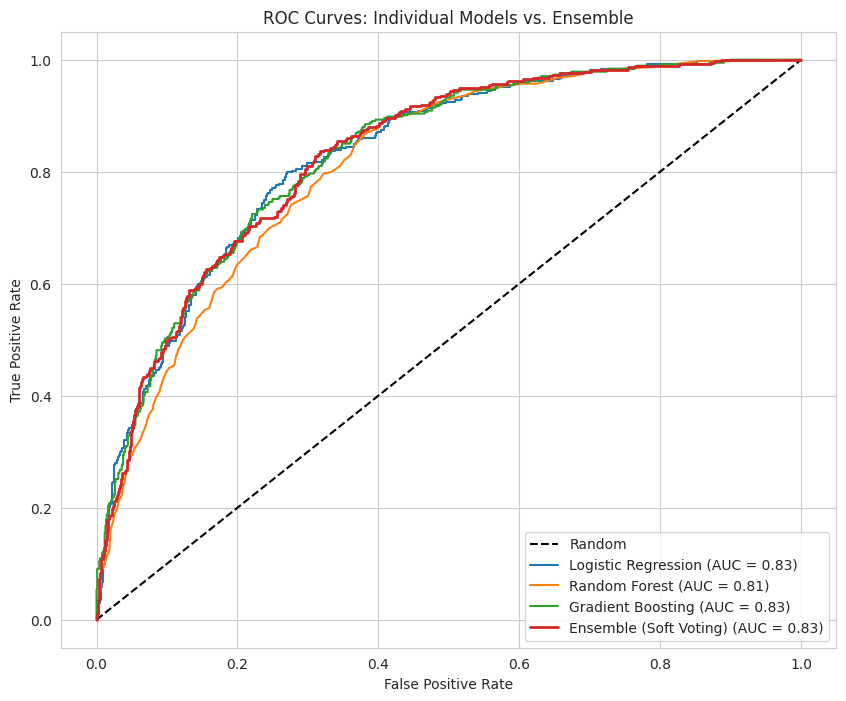

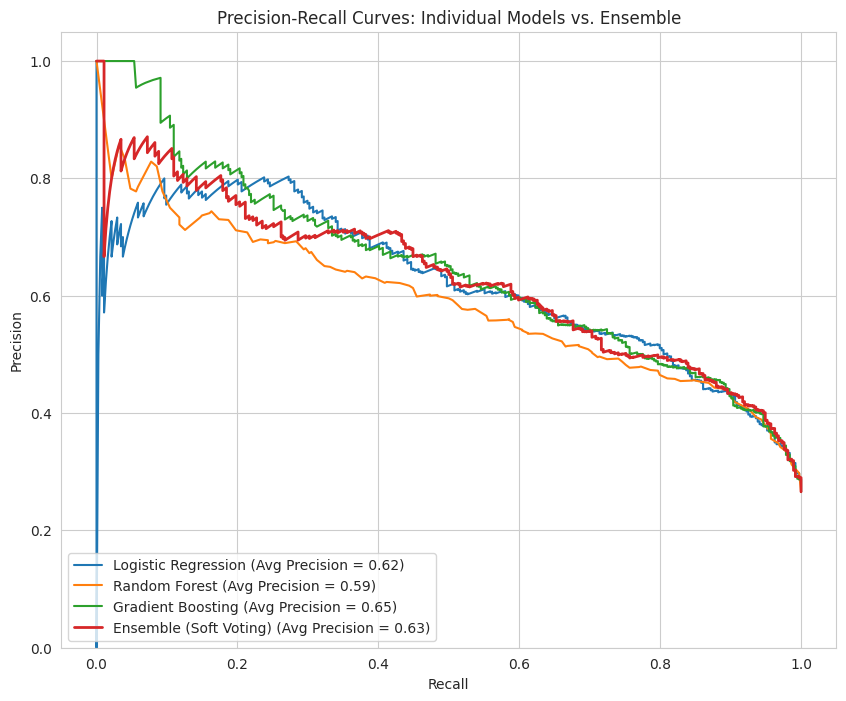

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve

sns.set_style("whitegrid")

lr_test_proba = lr_model.predict_proba(X_test)[:, 1]
rf_test_proba = rf_model.predict_proba(X_test)[:, 1]
gb_test_proba = gb_model.predict_proba(X_test)[:, 1]

lr_roc_auc = roc_auc_score(y_test, lr_test_proba)
rf_roc_auc = roc_auc_score(y_test, rf_test_proba)
gb_roc_auc = roc_auc_score(y_test, gb_test_proba)

lr_avg_precision = average_precision_score(y_test, lr_test_proba)
rf_avg_precision = average_precision_score(y_test, rf_test_proba)
gb_avg_precision = average_precision_score(y_test, gb_test_proba)

plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Individual models
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_test_proba)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_test_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_test_proba)
roc_auc_gb = auc(fpr_gb, tpr_gb)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')

# Ensemble model
fpr_voting, tpr_voting, _ = roc_curve(y_test, voting_test_proba)
roc_auc_voting = auc(fpr_voting, tpr_voting)
plt.plot(fpr_voting, tpr_voting, label=f'Ensemble (Soft Voting) (AUC = {roc_auc_voting:.2f})', linewidth=2, linestyle='-')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: Individual Models vs. Ensemble')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(10, 8))

# Individual models
precision_lr, recall_lr, _ = precision_recall_curve(y_test, lr_test_proba)
plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (Avg Precision = {lr_avg_precision:.2f})')

precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_test_proba)
plt.plot(recall_rf, precision_rf, label=f'Random Forest (Avg Precision = {rf_avg_precision:.2f})')

precision_gb, recall_gb, _ = precision_recall_curve(y_test, gb_test_proba)
plt.plot(recall_gb, precision_gb, label=f'Gradient Boosting (Avg Precision = {gb_avg_precision:.2f})')

# Ensemble model
precision_voting, recall_voting, _ = precision_recall_curve(y_test, voting_test_proba)
plt.plot(recall_voting, precision_voting, label=f'Ensemble (Soft Voting) (Avg Precision = {voting_avg_precision:.2f})', linewidth=2, linestyle='-')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves: Individual Models vs. Ensemble')
plt.legend(loc='lower left')
plt.ylim([0, 1.05])
plt.show()

In [38]:
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

print("Performing cross-validation...")
lr_cv_results = cross_validate(lr_model, X_train, y_train, cv=5, scoring=scoring)
rf_cv_results = cross_validate(rf_model, X_train, y_train, cv=5, scoring=scoring)
gb_cv_results = cross_validate(gb_model, X_train, y_train, cv=5, scoring=scoring)
print("Cross-validation completed.")

print("\nEvaluating models on the test set...")
lr_test_pred = lr_model.predict(X_test)
rf_test_pred = rf_model.predict(X_test)
gb_test_pred = gb_model.predict(X_test)

lr_test_metrics = {
    'accuracy': accuracy_score(y_test, lr_test_pred),
    'precision': precision_score(y_test, lr_test_pred),
    'recall': recall_score(y_test, lr_test_pred),
    'f1': f1_score(y_test, lr_test_pred)
}

rf_test_metrics = {
    'accuracy': accuracy_score(y_test, rf_test_pred),
    'precision': precision_score(y_test, rf_test_pred),
    'recall': recall_score(y_test, rf_test_pred),
    'f1': f1_score(y_test, rf_test_pred)
}

gb_test_metrics = {
    'accuracy': accuracy_score(y_test, gb_test_pred),
    'precision': precision_score(y_test, gb_test_pred),
    'recall': recall_score(y_test, gb_test_pred),
    'f1': f1_score(y_test, gb_test_pred)
}
print("Test set evaluation completed.")

print("\nCross-validation Results (Mean ± Std):")
print("Logistic Regression:")
for metric in scoring:
    if f'test_{metric}' in lr_cv_results:
        mean = lr_cv_results[f'test_{metric}'].mean()
        std = lr_cv_results[f'test_{metric}'].std()
        print(f"  {metric}: {mean:.4f} ± {std:.4f}")
    else:
        print(f"  {metric}: Metric not available in CV results")


print("\nRandom Forest:")
for metric in scoring:
    if f'test_{metric}' in rf_cv_results:
        mean = rf_cv_results[f'test_{metric}'].mean()
        std = rf_cv_results[f'test_{metric}'].std()
        print(f"  {metric}: {mean:.4f} ± {std:.4f}")
    else:
        print(f"  {metric}: N/A (Metric not available in CV results)")

print("\nGradient Boosting:")
for metric in scoring:
     if f'test_{metric}' in gb_cv_results:
        mean = gb_cv_results[f'test_{metric}'].mean()
        std = gb_cv_results[f'test_{metric}'].std()
        print(f"  {metric}: {mean:.4f} ± {std:.4f}")
     else:
        print(f"  {metric}: N/A (Metric not available in CV results)")


print("\nTest Set Evaluation Metrics:")
print("Logistic Regression:", lr_test_metrics)
print("Random Forest:", rf_test_metrics)
print("Gradient Boosting:", gb_test_metrics)

lr_test_proba = lr_model.predict_proba(X_test)[:, 1]
rf_test_proba = rf_model.predict_proba(X_test)[:, 1]
gb_test_proba = gb_model.predict_proba(X_test)[:, 1]

lr_roc_auc = roc_auc_score(y_test, lr_test_proba)
rf_roc_auc = roc_auc_score(y_test, rf_test_proba)
gb_roc_auc = roc_auc_score(y_test, gb_test_proba)

lr_avg_precision = average_precision_score(y_test, lr_test_proba)
rf_avg_precision = average_precision_score(y_test, rf_test_proba)
gb_avg_precision = average_precision_score(y_test, gb_test_proba)

print("\nTest Set ROC AUC and Average Precision:")
print(f"Logistic Regression - ROC AUC: {lr_roc_auc:.4f}, Average Precision: {lr_avg_precision:.4f}")
print(f"Random Forest - ROC AUC: {rf_roc_auc:.4f}, Average Precision: {rf_avg_precision:.4f}")
print(f"Gradient Boosting - ROC AUC: {gb_roc_auc:.4f}, Average Precision: {gb_avg_precision:.4f}")

print("\nPredicted probabilities for the positive class on the test set have been stored.")

Performing cross-validation...
Cross-validation completed.

Evaluating models on the test set...
Test set evaluation completed.

Cross-validation Results (Mean ± Std):
Logistic Regression:
  accuracy: 0.8085 ± 0.0126
  precision: 0.6650 ± 0.0244
  recall: 0.5619 ± 0.0346
  f1: 0.6090 ± 0.0305
  roc_auc: 0.8474 ± 0.0172

Random Forest:
  accuracy: 0.7970 ± 0.0051
  precision: 0.6488 ± 0.0180
  recall: 0.5171 ± 0.0202
  f1: 0.5750 ± 0.0112
  roc_auc: 0.8311 ± 0.0092

Gradient Boosting:
  accuracy: 0.8023 ± 0.0090
  precision: 0.6577 ± 0.0221
  recall: 0.5344 ± 0.0217
  f1: 0.5896 ± 0.0201
  roc_auc: 0.8490 ± 0.0150

Test Set Evaluation Metrics:
Logistic Regression: {'accuracy': 0.7412935323383084, 'precision': 0.5084745762711864, 'recall': 0.8021390374331551, 'f1': 0.6224066390041494}
Random Forest: {'accuracy': 0.7654584221748401, 'precision': 0.5578947368421052, 'recall': 0.5668449197860963, 'f1': 0.5623342175066313}
Gradient Boosting: {'accuracy': 0.7661691542288557, 'precision': 0.55